
# Project:  Wrangling, analyzing and visualizing of WeRateDog data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I selected the "No-show Appointments" dataset for analysis. This dataset is on medical appointments in brazil and it is focused on whether or not a patient a patient show up for their appointment. The characters of each patient included in each row are PatientId,	AppointmentID,	Gender,	ScheduledDay, AppointmentDay, Age, Neighbourhood, 	Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received. The last five characteristics are inputed in the columns as 0 and 1, where '0' indicates 'no' and '1' indicates 'yes'.


>The research questions for this project include;

> 1. Which age category have more effect on keeping appointments?

> 2. Does having scholarship have a significant effect on helping patients keep appointments?



In [1]:
# import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

### General Properties

In [2]:
# Loading the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


####  We need to confirm what we have in some columns especially; especially the No-show column


In [4]:
# checking for number of unqiue values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
# checking of unqiue values in the No-show column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

 From observation I have confirmed that the No-show column has just two categories;<br>
- **Yes** for missing appointment and **No** for keeping appointment

### Data Cleaning 
> In this section, I checked for missing values, datatypes and values that are not suitable for analysis ( especially the age column)


> #### Checking for missing values and datatypes
* The info method gives a count that is equal for all columns, and this shows there are **no missing values** in any of the columns.
* However I observed the ScheduledDay and AppointmentDay columns are strings instead of datetime datatype. This will be fixed by converting the datatypes of the columns to datetime



In [6]:
# checking for missing values
#and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# changing the ScheduledDay column datatype to datatime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# verify change
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

> #### checking for duplicate data
* from observation, there are no duplicate  data entry

In [8]:
# checking for dum of duplicated rows
sum(df.duplicated())

0

In [22]:
# checking the statistical properties of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> from using the describe method I observed the Age column has a negative value, this is not realistic as age can not be negative. Let us examine the Age dataset

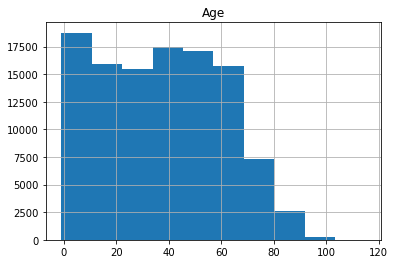

In [10]:
df.hist(column='Age');

From the histogram distribution of Ages, we can observe that some individuals have ages lesser than zero. This patient data should be removed as age can not be less than zero. I also observed there are outliers(ages above 90 seems to be an outliers. We will check further using a boxplot 

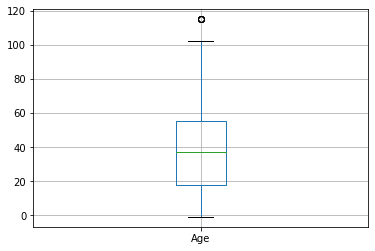

In [11]:
df.boxplot(column='Age');

The outliers seem to be above 110. We will remove data with ages 110 and above

> let's create a function to filter the dataframe based on a condition and return the filtered data frame, as it appears we will be removing more than one unwanted data 

In [12]:
# filter function to help filter our df based a condition
def filter_df(df,condition):
    new_dataFrame = df[condition]
    return new_dataFrame

Cleaning the age column

In [13]:
# creating a condition to filter the dataframe based ages of patients with positive ages
positiveAges = df['Age'] >= 0

# filtering our df with the filter_df function
df = filter_df(df,positiveAges)

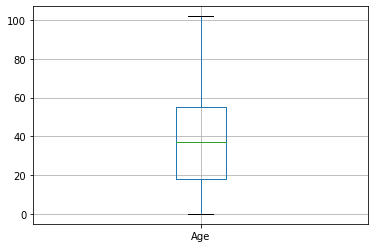

In [14]:
# creating a condition to filter the dataframe based ages below 110
filter_oulier = df['Age'] < 110

# filtering our df with the filter_df function
df = filter_df(df,filter_oulier)

# verify using boxplot
df.boxplot(column='Age');

> The age column now looks good and ready to use for EDA

<a id='eda'></a>
## Exploratory Data Analysis

> Now let's explore our data to prvide answers to the research questions



### Question1: Does age category affect keeping appointments?

I will split the ages into categories defined according to [canadian government department of statistics](https://www.statcan.gc.ca/en/concepts/definitions/age2).

* Children (00-14 years)
* Youth (15-24 years)
* Adults (25-64 years)
* Seniors (65 years and over)

In [15]:

# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 0, 14, 24, 64 , 109]


# Labels for the age groups
bin_names = ['Children' ,'Youth' ,'Adults' ,'Seniors' ] 

# creating the age group column
df['age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

# verify
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adults
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adults
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adults
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adults


Let's check the age group that missed or kept the appoinment most

In [16]:
# conditions based on people that missed appointment
# and those that showed for appoinment
no_show = df['No-show'] == 'Yes'
show = df['No-show'] == 'No'

In [17]:
# creating an array of counts of patients based on age groups
age_group_show= df[show].groupby('age_group')['No-show'].value_counts()
age_group_Noshow = df[no_show].groupby('age_group')['No-show'].value_counts()


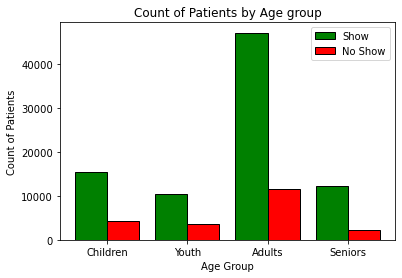

In [18]:
# setting up parameters for the bar chart
width = 0.4
ind = np.arange(len(age_group_show))

# plot the bar chart
show_bars = plt.bar(ind,age_group_show, color ='g', width =width ,
        edgecolor ='black',label='Show')
noshow_bars = plt.bar(ind + width, age_group_Noshow, width =width,
             edgecolor ='black', color='r', label='No Show')

# labels and title
plt.ylabel('Count of Patients')
plt.xlabel('Age Group')
plt.title('Count of Patients by Age group')

# fitting labels to x axis
locations = ind + width / 2  # xtick locations
labels = ['Children','Youth','Adults','Seniors']  # xtick labels
plt.xticks(locations, labels)

# setting legend
plt.legend()

**Observation**: from the bar chart, the adult group showed up more than other age groups. Although this is due to the their fraction of the total statistics, there is a significant difference between adults who showed up and adults who didn't. The Senior group had the lowest number of patients who missed appointments

### Question 2: Does having scholarship have a significant effect on helping patients keep appointments?

Let's check the number of patients who kept their appointments





In [19]:
# condition for scholarship patients
scholarship = df['Scholarship'] == 1
no_scholarship = df['Scholarship'] == 0

# print the the number of patients who had scholarship
print("Number of patients who had scholarship:",
      len(df[scholarship]))

Number of patients who had scholarship: 10861


Let's plot a pie chart of the proportion of those who kept the appointment and those who didn't of the 10861 patients that had scholarship

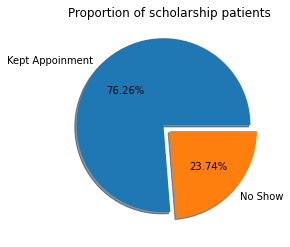

In [20]:
# an array of count of patients who got scholarship
count = df[scholarship].groupby('No-show')['Scholarship'].value_counts()

# plotting the pie chart of patients who has scholarship
plt.pie(count, labels=['Kept Appoinment','No Show'],explode = [0.1,0], autopct='%1.2f%%',
        shadow=True);

# setting the title of pie chart
plt.title('Proportion of scholarship patients');

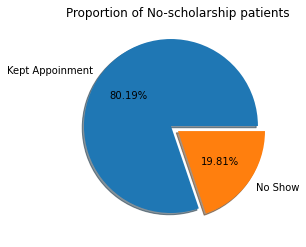

In [21]:
# an array of count of patients who got scholarship
count2 = df[no_scholarship].groupby('No-show')['Scholarship'].value_counts()

# plotting the pie chart of patients who has scholarship
plt.pie(count2, labels=['Kept Appoinment','No Show'],explode = [0.1,0], autopct='%1.2f%%',
        shadow=True);

# setting the title of pie chart
plt.title('Proportion of No-scholarship patients');

**Observation**: It is obvious from the chart that appproxiamately 76% of those that have scholarship showed up for their appoinment, while 80% of patients of patients without scholarship showed up for their appointments.

<a id='conclusions'></a>
## Conclusions

> **Summary** 
> * It is obvious that the adult group kept appointments more that other age groups as there is a significant difference between the age group and other age groups as shown in the 'count of patient by age group' bar chart.
> * There is no significant difference between those who have scholarship and those who don't. Looking at the proportion of the schlarship patients who kept to appointments, there is a reasonable difference. But if we compare this with the proportion of No-scholarship patients who kept to appointments, having a scholarship does not have nuch signifance.

> **Limitations**
> * I am unable to ascertian if giving scholarship will help patients keep to appointments without further statistical test. The above analysis is not able to give further. It is expected that thoes who have scholarship should take the opportunity but it is not stated if appointments could be rescheduled while retained the scholarship status, as this could also have effected how patients respond to scholarship appointments
> * I was unable to get statiistics of age groupings in brazil. The population is brazil, the age grouping in the country could be different to that of canada.





## References

https://shawnemhe.github.io/udacity-data-analyst//p2/Investigate_a_Dataset.html

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

https://www.geeksforgeeks.org/bar-plot-in-matplotlib/